<a href="https://colab.research.google.com/github/jianning1/Capstone-Project/blob/master/Pre_processing_%2B_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Python Libaries

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import string
import spacy 
import os
import sys
import numpy as np

nlp = spacy.load('en', disable=['ner', 'parser'])
import nltk
from nltk.stem.snowball import SnowballStemmer
from scipy import stats

from time import time
from collections import defaultdict
import gc
import io
import random

from __future__ import print_function, division
from builtins import range
import os
import sys
import numpy as np
import operator

import nltk
nltk.download('all')
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize


import keras
from keras.models import Model, Sequential
from keras.layers import Dense, Embedding, Input
from keras.layers import LSTM, Bidirectional, GlobalMaxPooling1D, Dropout, Conv1D, GRU, Layer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.optimizers import Adam, SGD
from sklearn.metrics import roc_auc_score
import keras.backend as K
from keras.layers import CuDNNLSTM as LSTM
from keras.models import load_model
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

from keras import metrics
from tensorflow.python.keras.metrics import Metric


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from sklearn.utils import shuffle

from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
# install tensorflow 2.0
!pip uninstall tensorflow
!pip install tensorflow-gpu==2.1.0

Uninstalling tensorflow-2.2.0rc2:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.2.0rc2.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.2.0rc2
     |████████████████████████████████| 421.8MB 32kB/s 
     |████████████████████████████████| 450kB 50.2MB/s 
     |████████████████████████████████| 3.9MB 64.5MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=3dfefc7e89c717e17b54c497e51c0c08ae17e2fc81b43c67c7bd0739b81294aa
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstal

In [0]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [0]:
# check the availability of GPU
%tensorflow_version 2.x
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))


Found GPU at: /device:GPU:0


# Import and slice data

In [0]:
# Mount Google Drive (to save the downloaded files)
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
# read CSV file
mydata = pd.read_csv('/gdrive/My Drive/Full-Economic-News-DFE.csv', encoding = "ISO-8859-1")

In [0]:
data = mydata[['_unit_id','positivity', 'relevance', 'date','headline', 'text']]

data.head()

,_unit_id,positivity,relevance,date,headline,text
0,842613455,3.0,yes,8/14/91,Yields on CDs Fell in the Latest Week,NEW YORK -- Yields on most certificates of dep...
1,842613456,NaN,no,8/21/07,The Morning Brief: White House Seeks to Limit ...,The Wall Street Journal Online</br></br>The Mo...
2,842613457,NaN,no,11/14/91,Banking Bill Negotiators Set Compromise --- Pl...,WASHINGTON -- In an effort to achieve banking ...
3,842613458,NaN,no,6/16/86,Manager's Journal: Sniffing Out Drug Abusers I...,The statistics on the enormous costs of employ...
4,842613459,3.0,yes,10/4/02,Currency Trading: Dollar Remains in Tight Rang...,NEW YORK -- Indecision marked the dollar's ton...


# Data Description

In [0]:
# distribution of news relevance
dist = data[['_unit_id','relevance']].groupby('relevance').count()
dist

,_unit_id
relevance,
no,6571
not sure,9
yes,1420


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


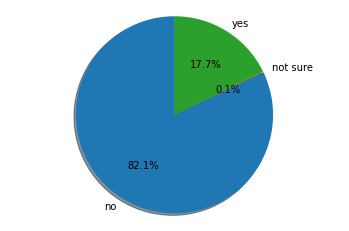

In [0]:
# pie chart of distribution of news relevance
fig1, ax1 = plt.subplots()
sizes = dist.values
label = dist.index.tolist()

ax1.pie(sizes, labels=label, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')    
plt.show()

In [0]:
# distribution of positivity of news that relevant to US economy
dist = data[data['positivity']!=0][['positivity','_unit_id']].groupby('positivity').count()
dist

,_unit_id
positivity,
2.0,35
3.0,343
4.0,255
5.0,205
6.0,214
7.0,295
8.0,71
9.0,2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


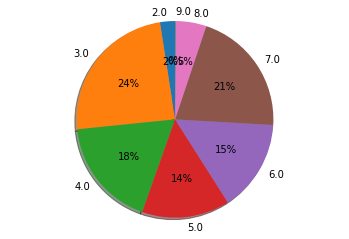

In [0]:
# pie chart of the distribution of positivity of US economy relevant news
fig1, ax1 = plt.subplots()
sizes = dist.values
label = dist.index.tolist()

ax1.pie(sizes, labels=label, autopct='%1.0f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.show()

# Pre-processing

## Check missing values

In [0]:
# no missing values in 'relevance'
sum(data['relevance'].isnull())

0

In [0]:
# no missing values in 'positivity'
sum(data[data['relevance']=='yes']['positivity'].isnull())

0

## Remove ambiguious data

In [0]:
# remove observations that are 'not sure' whether relevant to US economy
data = data[data.relevance != 'not sure']

# covert boolean type 'yes/no' to '1/0'
data.relevance = data.relevance.map(dict(yes=1, no=0))

# new feature 'texts' to include 'headline' and 'text' features
data['texts'] = data['headline'] + (' ') + data['text']

## Check Embeddings Coverage 
Self-defined funtion to check the proportion of words and texts covered by selected pre-trained word vectors

In [0]:
import operator

# split each sentences into a list of words
# return a dictionary of vocabulary with frequency 
def build_vocab(X):
    
    news = X.apply(lambda s: s.split()).values      
    vocab = {}
    
    for n in news:
        for word in n:
            try:
                vocab[word] += 1
            except KeyError:
                vocab[word] = 1                
    return vocab

# go through each word and check whether the word is in pre-trained word vectors
# return a list of uncovered vocabulary, unique words coverage and overall texts coverage.
def check_embeddings_coverage(X, embeddings):
    
    vocab = build_vocab(X)    
    
    covered = {}
    oov = {}    
    n_covered = 0
    n_oov = 0
    
    for word in vocab:
        try:
            covered[word] = embeddings[word]
            n_covered += vocab[word]
        except:
            oov[word] = vocab[word]
            n_oov += vocab[word]
            
    vocab_coverage = len(covered) / len(vocab)
    text_coverage = (n_covered / (n_covered + n_oov))
    
    sorted_oov = sorted(oov.items(), key=operator.itemgetter(1))[::-1]
    return sorted_oov, vocab_coverage, text_coverage

### GloVe Pretrained Word Embedding loading

In [0]:
# Load GloVe Embeddings
print('Loading GloVe Embeddings.')

glove_embeddings = {}
f = open('/gdrive/My Drive/glove.42B.300d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    glove_embeddings[word] = coefs
f.close()

print('Found %s word vectors.' % len(glove_embeddings))


Loading GloVe Embeddings.
Found 1917495 word vectors.


### GloVe words and texts coverage

In [0]:
texts_glove_oov, texts_glove_vocab_coverage, texts_glove_text_coverage = check_embeddings_coverage(data['texts'], glove_embeddings)
print('GloVe Embeddings cover {:.2%} of vocabulary and {:.2%} of text in texts'.format(texts_glove_vocab_coverage, texts_glove_text_coverage))

GloVe Embeddings cover 23.86% of vocabulary and 75.26% of text in texts


### Fasttext Pretrained Word Embedding loading

In [0]:
fin = io.open('/gdrive/My Drive/wiki-news-300d-1M-subword.vec', 'r', encoding='utf-8', newline='\n', errors='ignore')
n, d = map(int, fin.readline().split())
fasttext_embeddings = {}
for line in fin:
    tokens = line.rstrip().split(' ')
    fasttext_embeddings[tokens[0]] = map(float, tokens[1:])
fin.close()

print('Found %s word vectors.' % len(fasttext_embeddings))

Found 999994 word vectors.


### Fasttext words and texts coverage

In [0]:
texts_fasttext_oov, texts_fasttext_vocab_coverage, texts_fasttext_text_coverage = check_embeddings_coverage(data['texts'], fasttext_embeddings)
print('Fasttext Embeddings cover {:.2%} of vocabulary and {:.2%} of text in texts'.format(texts_fasttext_vocab_coverage, texts_fasttext_text_coverage))

Fasttext Embeddings cover 36.14% of vocabulary and 87.82% of text in texts


## Remove url and html

In [0]:
# function to remove url
def rm_url(contents):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',contents)

# function to remove html
def rm_html(contents):
    html=re.compile(r'<.*?>')
    return html.sub(r'',contents)

In [0]:
data['texts'] = data['texts'].apply(rm_url)
data['texts'] = data['texts'].apply(rm_html)

In [0]:
# GloVe words and texts coverage check
texts_glove_oov, texts_glove_vocab_coverage, texts_glove_text_coverage = check_embeddings_coverage(data['texts'], glove_embeddings)
print('GloVe Embeddings cover {:.2%} of vocabulary and {:.2%} of text in texts'.format(texts_glove_vocab_coverage, texts_glove_text_coverage))

# Fasttext words and texts coverage check
texts_fasttext_oov, texts_fasttext_vocab_coverage, texts_fasttext_text_coverage = check_embeddings_coverage(data['texts'], fasttext_embeddings)
print('Fasttext Embeddings cover {:.2%} of vocabulary and {:.2%} of text in texts'.format(texts_fasttext_vocab_coverage, texts_fasttext_text_coverage))

GloVe Embeddings cover 23.96% of vocabulary and 75.27% of text in texts
Fasttext Embeddings cover 36.70% of vocabulary and 88.01% of text in texts


In [0]:
data.head(5)

,_unit_id,positivity,relevance,date,headline,text,texts
0,842613455,3.0,1,8/14/91,Yields on CDs Fell in the Latest Week,NEW YORK -- Yields on most certificates of dep...,Yields on CDs Fell in the Latest Week NEW YORK...
1,842613456,NaN,0,8/21/07,The Morning Brief: White House Seeks to Limit ...,The Wall Street Journal Online</br></br>The Mo...,The Morning Brief: White House Seeks to Limit ...
2,842613457,NaN,0,11/14/91,Banking Bill Negotiators Set Compromise --- Pl...,WASHINGTON -- In an effort to achieve banking ...,Banking Bill Negotiators Set Compromise --- Pl...
3,842613458,NaN,0,6/16/86,Manager's Journal: Sniffing Out Drug Abusers I...,The statistics on the enormous costs of employ...,Manager's Journal: Sniffing Out Drug Abusers I...
4,842613459,3.0,1,10/4/02,Currency Trading: Dollar Remains in Tight Rang...,NEW YORK -- Indecision marked the dollar's ton...,Currency Trading: Dollar Remains in Tight Rang...


## Remove non-alphabet characters and lower case

In [0]:
data['texts'] = [re.sub("[^A-Za-z ']+", ' ', str(line)).lower() for line in data['texts']]

In [0]:
# GloVe words and texts coverage check
texts_glove_oov, texts_glove_vocab_coverage, texts_glove_text_coverage = check_embeddings_coverage(data['texts'], glove_embeddings)
print('GloVe Embeddings cover {:.2%} of vocabulary and {:.2%} of text in texts'.format(texts_glove_vocab_coverage, texts_glove_text_coverage))

# Fasttext words and texts coverage check
texts_fasttext_oov, texts_fasttext_vocab_coverage, texts_fasttext_text_coverage = check_embeddings_coverage(data['texts'], fasttext_embeddings)
print('Fasttext Embeddings cover {:.2%} of vocabulary and {:.2%} of text in texts'.format(texts_fasttext_vocab_coverage, texts_fasttext_text_coverage))

GloVe Embeddings cover 83.24% of vocabulary and 98.70% of text in texts
Fasttext Embeddings cover 70.46% of vocabulary and 97.69% of text in texts


In [0]:
data.head(5)

,_unit_id,positivity,relevance,date,headline,text,texts
0,842613455,3.0,1,8/14/91,Yields on CDs Fell in the Latest Week,NEW YORK -- Yields on most certificates of dep...,yields on cds fell in the latest week new york...
1,842613456,NaN,0,8/21/07,The Morning Brief: White House Seeks to Limit ...,The Wall Street Journal Online</br></br>The Mo...,the morning brief white house seeks to limit ...
2,842613457,NaN,0,11/14/91,Banking Bill Negotiators Set Compromise --- Pl...,WASHINGTON -- In an effort to achieve banking ...,banking bill negotiators set compromise plan...
3,842613458,NaN,0,6/16/86,Manager's Journal: Sniffing Out Drug Abusers I...,The statistics on the enormous costs of employ...,manager's journal sniffing out drug abusers i...
4,842613459,3.0,1,10/4/02,Currency Trading: Dollar Remains in Tight Rang...,NEW YORK -- Indecision marked the dollar's ton...,currency trading dollar remains in tight rang...


In [0]:
# This is to delete variables and release memory if needed
 del fasttext_embeddings, texts_glove_oov, texts_glove_vocab_coverage, texts_glove_text_coverage, texts_fasttext_oov, texts_fasttext_vocab_coverage, texts_fasttext_text_coverage
 gc.collect()

11

## Lemmatization and Stopwords removal

In [0]:
def cleaning(doc):
    # Lemmatizes and removes stopwords
    txt = [token.lemma_ for token in doc if not token.is_stop]  
    # if a sentence is only one or two words long,
    # the benefit for the training is very small
    if len(txt) > 2:
        return ' '.join(txt)

t = time()

data['texts'] = [cleaning(doc) for doc in nlp.pipe(data['texts'], batch_size=5000, n_threads=-1)]

print('Time to clean up everything: {} mins'.format(round((time() - t) / 60, 2)))

Time to clean up everything: 1.02 mins


In [0]:
# GloVe words and texts coverage check
texts_glove_oov, texts_glove_vocab_coverage, texts_glove_text_coverage = check_embeddings_coverage(data['texts'], glove_embeddings)
print('GloVe Embeddings cover {:.2%} of vocabulary and {:.2%} of text in texts'.format(texts_glove_vocab_coverage, texts_glove_text_coverage))

# Fasttext words and texts coverage check
texts_fasttext_oov, texts_fasttext_vocab_coverage, texts_fasttext_text_coverage = check_embeddings_coverage(data['texts'], fasttext_embeddings)
print('Fasttext Embeddings cover {:.2%} of vocabulary and {:.2%} of text in texts'.format(texts_fasttext_vocab_coverage, texts_fasttext_text_coverage))

GloVe Embeddings cover 86.54% of vocabulary and 99.48% of text in texts
Fasttext Embeddings cover 69.39% of vocabulary and 98.02% of text in texts


In [0]:
data.head(5)

,_unit_id,positivity,relevance,date,headline,text,texts
0,842613455,3.0,1,8/14/91,Yields on CDs Fell in the Latest Week,NEW YORK -- Yields on most certificates of dep...,yield cd fall late week new york yield cert...
1,842613456,NaN,0,8/21/07,The Morning Brief: White House Seeks to Limit ...,The Wall Street Journal Online</br></br>The Mo...,morning brief white house seek limit child i...
2,842613457,NaN,0,11/14/91,Banking Bill Negotiators Set Compromise --- Pl...,WASHINGTON -- In an effort to achieve banking ...,banking bill negotiator set compromise plan...
3,842613458,NaN,0,6/16/86,Manager's Journal: Sniffing Out Drug Abusers I...,The statistics on the enormous costs of employ...,manager journal sniff drug abuser quick fix ...
4,842613459,3.0,1,10/4/02,Currency Trading: Dollar Remains in Tight Rang...,NEW YORK -- Indecision marked the dollar's ton...,currency trading dollar remain tight range a...


In [0]:
# This is to delete variables and release memory if needed
del fasttext_embeddings, texts_glove_oov, texts_glove_vocab_coverage, texts_glove_text_coverage, texts_fasttext_oov, texts_fasttext_vocab_coverage, texts_fasttext_text_coverage
gc.collect()

0

## Stemming

In [0]:
#from nltk.stem import PorterStemmer
#stemmer = PorterStemmer()

In [0]:
#from nltk.stem import SnowballStemmer
#stemmer = SnowballStemmer(language='english')

In [0]:
#data['texts1'] = [[stemmer.stem(x) for x in line.split()] for line in data['texts']]


In [0]:
#d = data['texts1']
#for i in range(len(d)):
#  d[d.index[i]]= ' '.join(d[d.index[i]])
#data['texts1'] = d

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
# GloVe words and texts coverage check
#texts_glove_oov, texts_glove_vocab_coverage, texts_glove_text_coverage = check_embeddings_coverage(data['texts1'], glove_embeddings)
#print('GloVe Embeddings cover {:.2%} of vocabulary and {:.2%} of text in texts'.format(texts_glove_vocab_coverage, texts_glove_text_coverage))

# Fasttext words and texts coverage check
#texts_fasttext_oov, texts_fasttext_vocab_coverage, texts_fasttext_text_coverage = check_embeddings_coverage(data['texts1'], fasttext_embeddings)
#print('Fasttext Embeddings cover {:.2%} of vocabulary and {:.2%} of text in texts'.format(texts_fasttext_vocab_coverage, texts_fasttext_text_coverage))

GloVe Embeddings cover 72.04% of vocabulary and 96.59% of text in texts
Fasttext Embeddings cover 47.32% of vocabulary and 83.12% of text in texts


Either run before or after lemmatization, vocabulary coverage dropped to 70%, therefore, do not include stemming

In [0]:
data = data[['_unit_id', 'positivity', 'relevance', 'date', 'texts']]

# Export Cleaned data

In [0]:
from google.colab import files
data.to_csv('/gdrive/My Drive/cleaned_data.csv') 

In [0]:
# import cleaned data
data = pd.read_csv('/gdrive/My Drive/cleaned_data.csv')

In [0]:
data.head(5)

,Unnamed: 0,_unit_id,positivity,relevance,date,texts
0,0,842613455,3.0,1,8/14/91,yield cd fall late week new york yield cert...
1,1,842613456,NaN,0,8/21/07,morning brief white house seek limit child i...
2,2,842613457,NaN,0,11/14/91,banking bill negotiator set compromise plan...
3,3,842613458,NaN,0,6/16/86,manager journal sniff drug abuser quick fix ...
4,4,842613459,3.0,1,10/4/02,currency trading dollar remain tight range a...


# Exploratory Data Analysis

##Length and word counts of texts

In [0]:
# length of headline and text for all news
texts_len_r = data['texts'].str.len()
# number of words in headline for irrelevant news
texts_word_counts_r = data['texts'].str.split().str.len()

print('Total texts has {} to {} characters, {} to {} words.'.format(texts_len_r.min(),
                                                                    texts_len_r.max(),
                                                                    texts_word_counts_r.min(),
                                                                    texts_word_counts_r.max()))

Total texts has 83 to 3379 characters, 10 to 432 words.


Text(0.5, 1.0, 'number of words in headline and text')

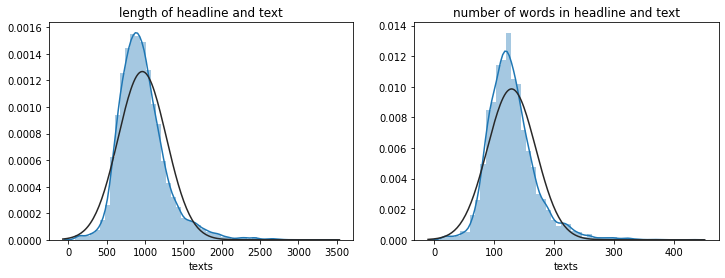

In [0]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.distplot(texts_len_r, ax = axes[0], fit=stats.norm, norm_hist=True)
axes[0].set_title('length of headline and text')

sns.distplot(texts_word_counts_r, ax = axes[1], fit=stats.norm, norm_hist=True)
axes[1].set_title('number of words in headline and text')

## Ngrams

In [0]:
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '']
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

N = 10

#r = data # all data
#r = data[data['relevance']==1] # for text classification, relevant news
#r = data[data['relevance']==0] # for text classification, irrelevant news
r = data[data['positivity']==9] # for sentiment analysis, positivity = 2-9

# Unigrams
texts_unigrams = defaultdict(int)

for text in r['texts']:
    for word in generate_ngrams(text):
        texts_unigrams[word] += 1
        
texts_unigrams = pd.DataFrame(sorted(texts_unigrams.items(), key=lambda x: x[1])[::-1])

# Bigrams
texts_bigrams = defaultdict(int)

for text in r['texts']:
    for word in generate_ngrams(text, n_gram=2):
        texts_bigrams[word] += 1
        
texts_bigrams = pd.DataFrame(sorted(texts_bigrams.items(), key=lambda x: x[1])[::-1])

# Trigrams
texts_trigrams = defaultdict(int)

for text in r['texts']:
    for word in generate_ngrams(text, n_gram=3):
        texts_trigrams[word] += 1
        
texts_trigrams = pd.DataFrame(sorted(texts_trigrams.items(), key=lambda x: x[1])[::-1])

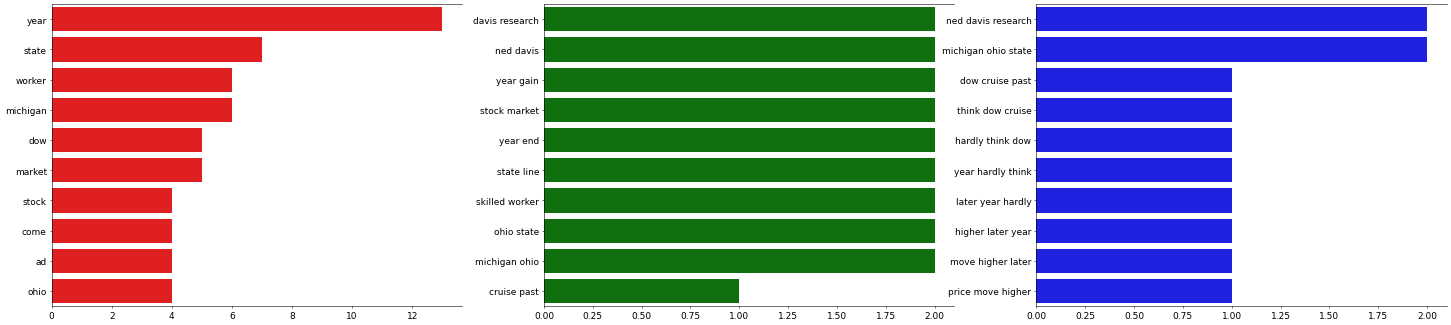

In [0]:
# Plot Ngrams
fig, axes = plt.subplots(ncols=3, figsize=(36, 8), dpi=50)

sns.barplot(y=texts_unigrams[0].values[:N], x=texts_unigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=texts_bigrams[0].values[:N], x=texts_bigrams[1].values[:N], ax=axes[1], color='green')
sns.barplot(y=texts_trigrams[0].values[:N], x=texts_trigrams[1].values[:N], ax=axes[2], color='blue')

for i in range(3):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)